In [17]:
import seaborn as sns
import seaborn.objects as so
import sklearn

# Uncomment this line to look at other available datasets
# sns.get_dataset_names()

In [41]:
penguins_raw_df = sns.load_dataset('penguins')
penguins_raw_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


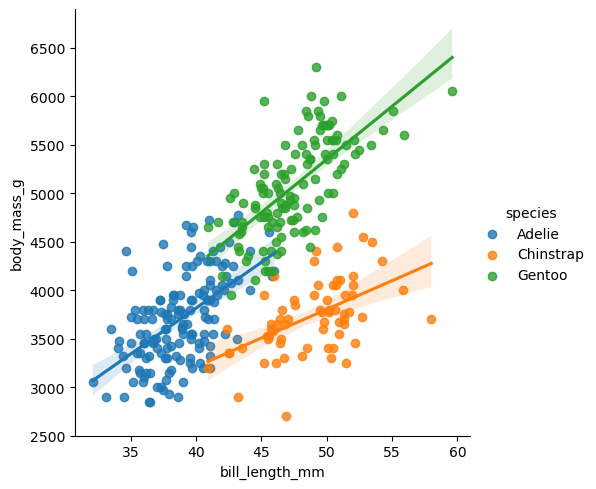

In [42]:
sns.lmplot(
    data=penguins_raw_df,
    x='bill_length_mm',
    y='body_mass_g',
    hue='species'
)

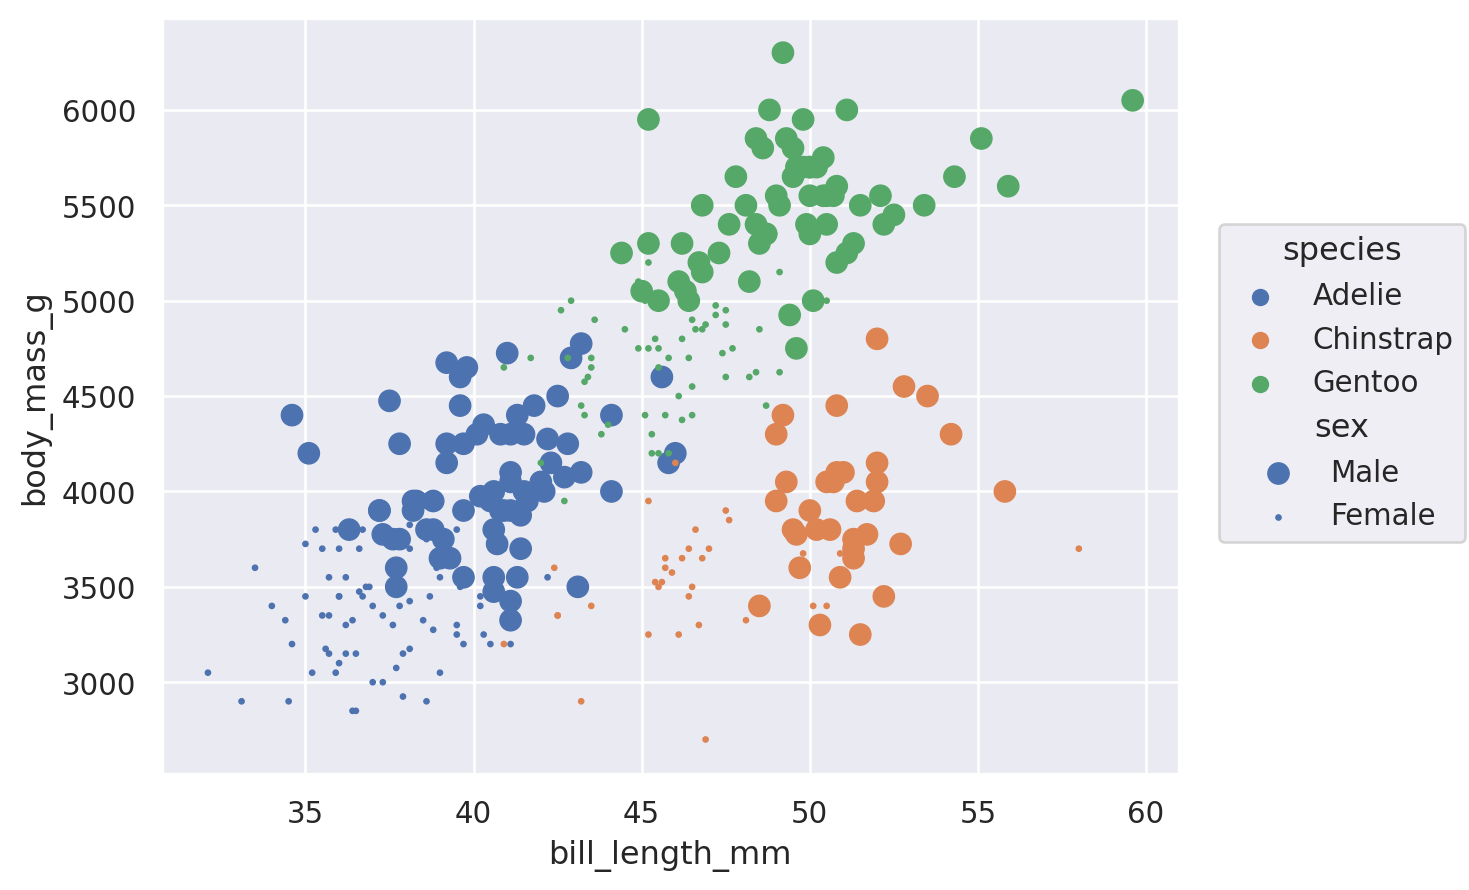

In [43]:
(so.Plot(data=penguins_raw_df,
         x='bill_length_mm', y='body_mass_g',
         color='species', pointsize='sex')
 .add(so.Dot())
)

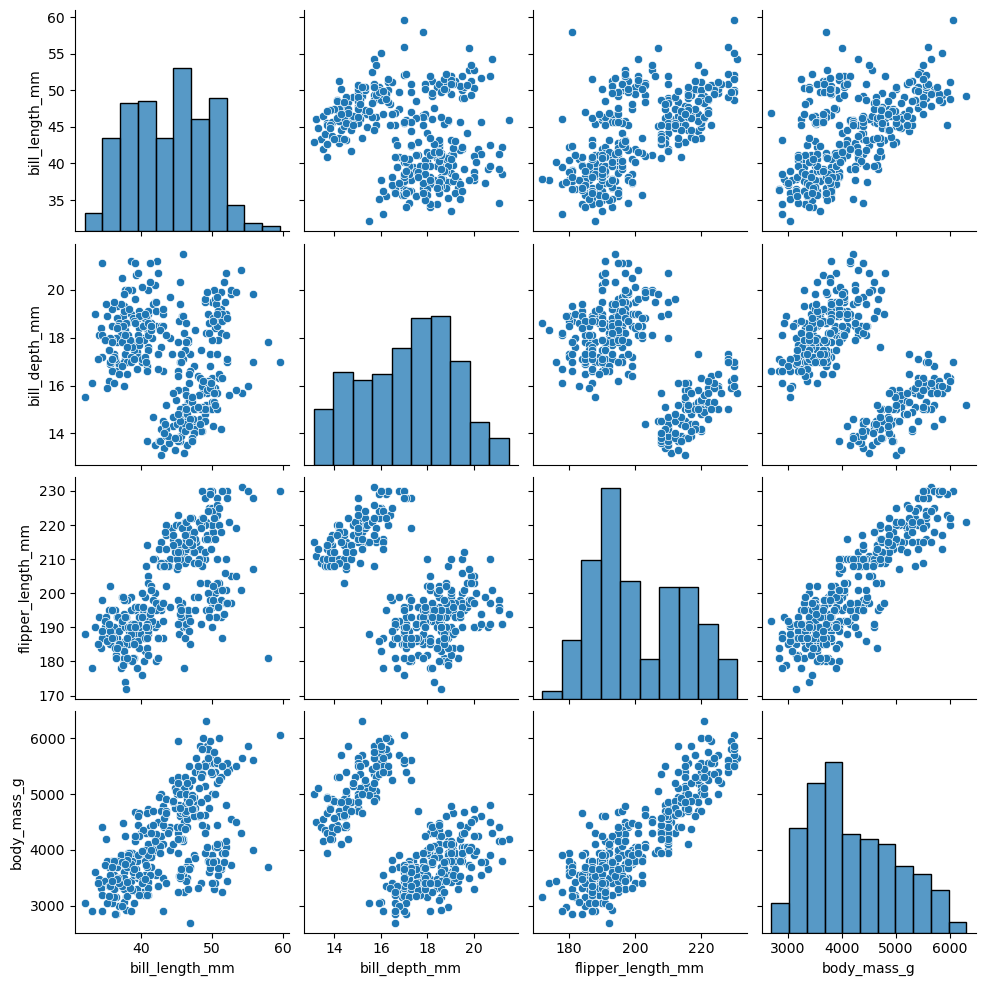

In [44]:
sns.pairplot(data=penguins_raw_df)

In [48]:
penguins_df = penguins_raw_df.dropna()

penguins_X = penguins_df.flipper_length_mm.values.reshape(-1, 1)
penguins_y = penguins_df.body_mass_g.values

Coefficients: 
 [50.15326594]
Mean squared error: 153789.68
Coefficient of determination: 0.76


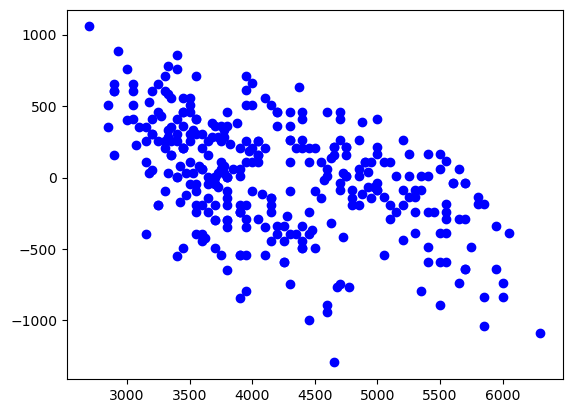

In [56]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(penguins_X, penguins_y)

# Make predictions using the testing set
penguins_predict_y = regr.predict(penguins_X)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: {:.2f}"
      .format(mean_squared_error(penguins_y, penguins_predict_y)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: {:.2f}"
      .format(r2_score(penguins_y, penguins_predict_y)))

# Plot outputs
import matplotlib.pyplot as plt
plt.scatter(
    penguins_y, 
    penguins_predict_y - penguins_y, 
    color="blue")
